<a href="https://colab.research.google.com/github/G-wilsoncyber/IOT_IDS_Trainer/blob/main/IOT_IDS_Trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **<p align = "center"> IOT IDS Trainer </p>**


 ---

 Author(s): Gregory Wilson and Leigh Anne Dunn

## Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier



Install Imblearn

In [ ]:
!pip install imbalanced-learn

### Import the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


## Exploratory Data Analysis

In [ ]:
import os

Current_Directory = os.getcwd()
print(Current_Directory)


/content


In [ ]:
ls -al

total 1900
drwxr-xr-x 1 root root    4096 Nov 19 14:41 ./
drwxr-xr-x 1 root root    4096 Nov 19 14:39 ../
drwxr-xr-x 4 root root    4096 Nov 15 14:19 .config/
-rw-r--r-- 1 root root 1928324 Nov 19 14:41 data.csv
drwxr-xr-x 1 root root    4096 Nov 15 14:19 sample_data/


In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23145 entries, 0 to 23144
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     23145 non-null  int64  
 1   id.orig_h      23145 non-null  object 
 2   id.orig_p      23145 non-null  int64  
 3   id.resp_h      23145 non-null  object 
 4   id.resp_p      23145 non-null  int64  
 5   proto          23145 non-null  object 
 6   service        1847 non-null   object 
 7   duration       5321 non-null   float64
 8   orig_bytes     5321 non-null   float64
 9   resp_bytes     5321 non-null   float64
 10  conn_state     23145 non-null  object 
 11  missed_bytes   23145 non-null  int64  
 12  history        23145 non-null  object 
 13  orig_pkts      23145 non-null  int64  
 14  orig_ip_bytes  23145 non-null  int64  
 15  resp_pkts      23145 non-null  int64  
 16  resp_ip_bytes  23145 non-null  int64  
 17  label          23145 non-null  object 
dtypes: flo

In [ ]:
df.head()

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,3.139211,0.0,0.0,S0,0,S,3,180,0,0,Benign
1,1,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
2,2,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
3,3,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,Benign
4,4,192.168.1.195,41042,185.244.25.235,80,tcp,NaN,3.147116,0.0,0.0,S0,0,S,3,180,0,0,Benign


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
id.orig_h,0
id.orig_p,0
id.resp_h,0
id.resp_p,0
proto,0
service,21298
duration,17824
orig_bytes,17824
resp_bytes,17824


In [ ]:
obj_cols = [i for i in df.columns if df[i].dtype.name=="object"]
obj_cols

['id.orig_h',
 'id.resp_h',
 'proto',
 'service',
 'conn_state',
 'history',
 'label']

Missing Values: service - 21298, duration - 17824, orig_bytes - 17824, resp_bytes - 17824


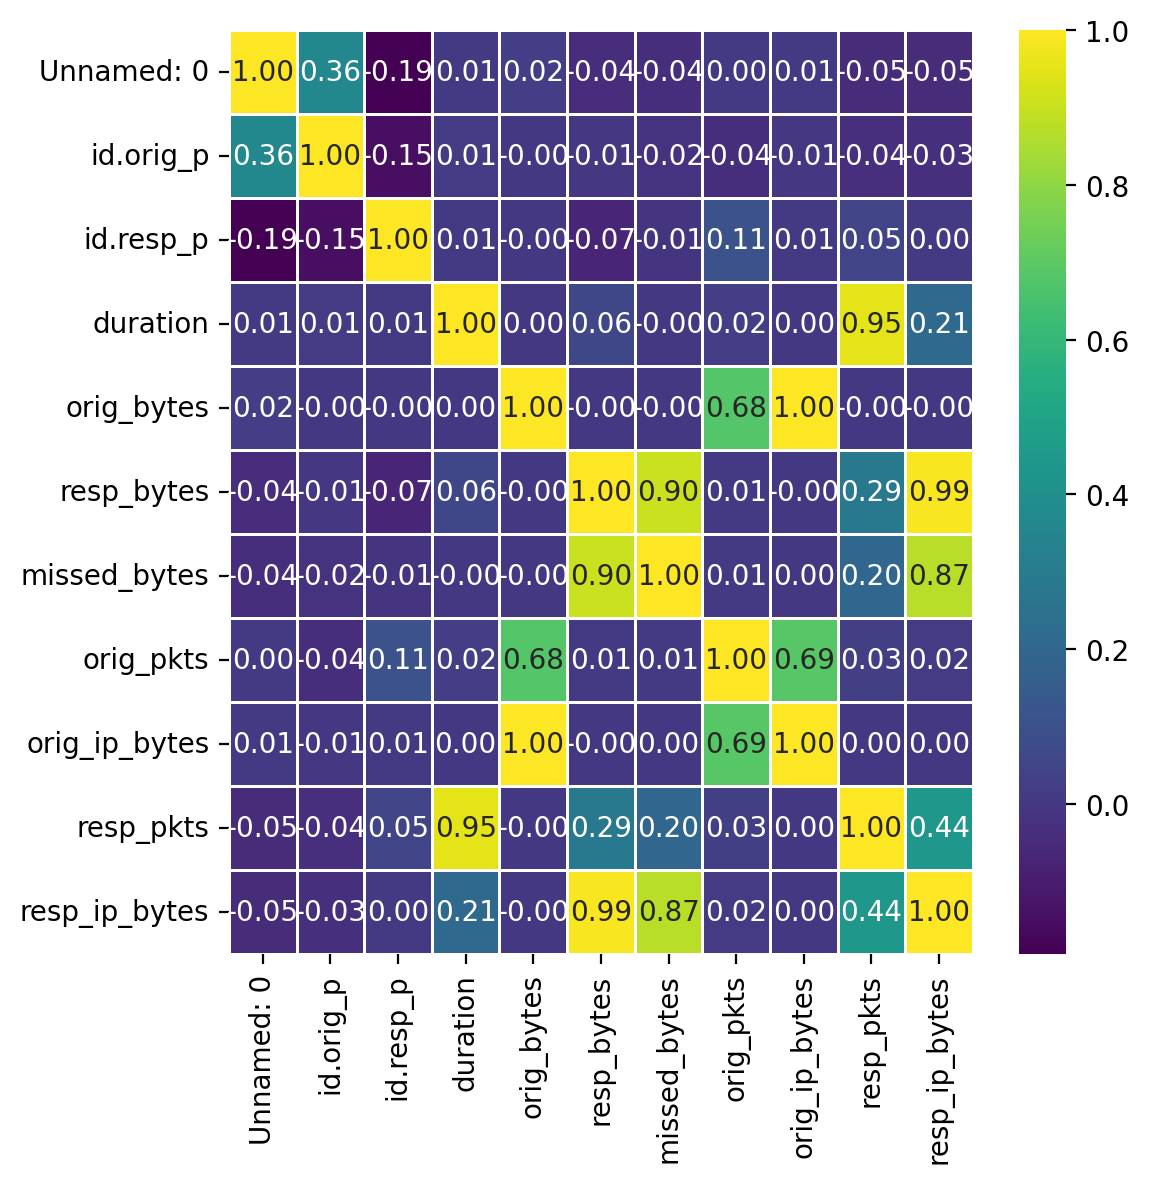

In [ ]:
plt.figure(figsize=(6, 6), dpi=200)
sns.heatmap(df.drop(obj_cols, axis=1).corr(),
            linewidths=.5,
            linecolor="white",
            cmap="viridis",
            annot=True,
            fmt=".2f")
print("Missing Values: service - 21298, duration - 17824, orig_bytes - 17824, resp_bytes - 17824")

In [ ]:
df["label"].value_counts()


,count
label,
Malicious,21222
Benign,1923


<Axes: >

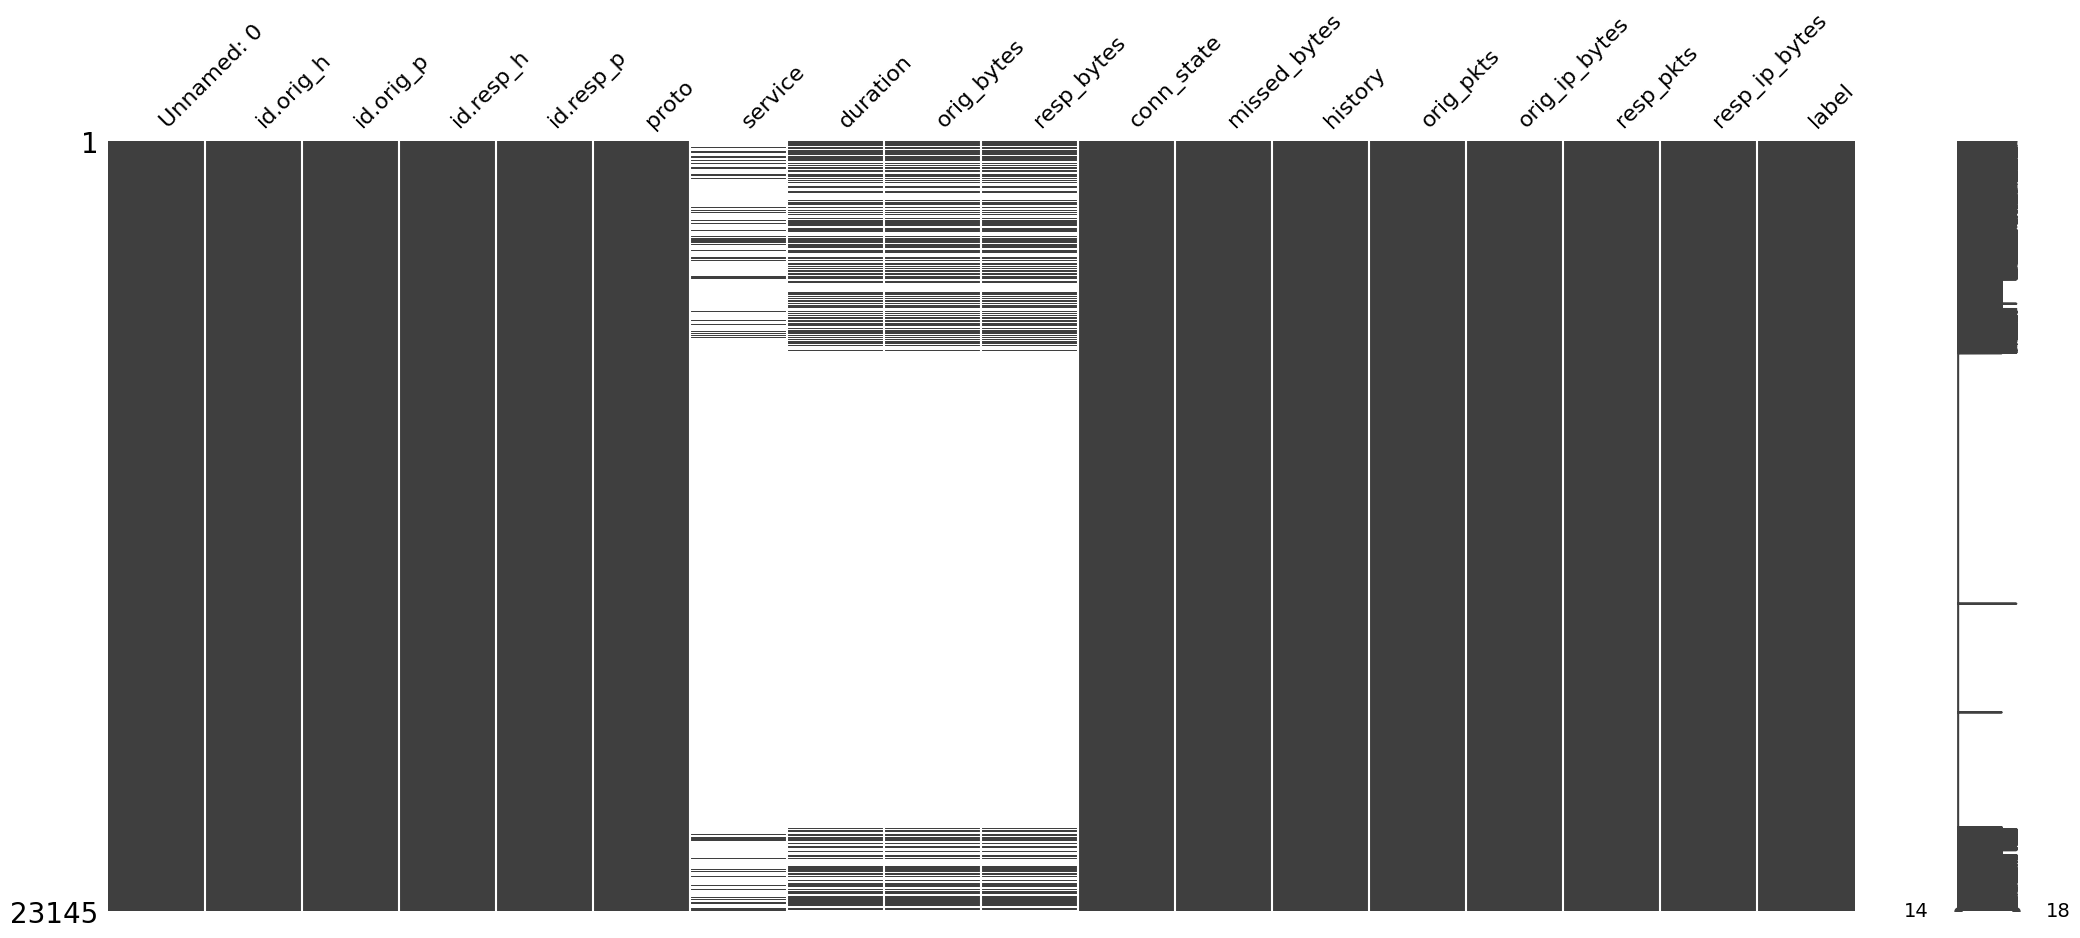

In [ ]:
import missingno as msno

msno.matrix(df)

# **Data Preprocessing**

# Remove the columns not needed

---



In [ ]:
df = df.drop(columns=['Unnamed: 0', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p'])

**Drop duplicates**

In [ ]:
df = df.drop_duplicates()

**Handle the missing values**

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

**Use the Imputer to handle numerical missing values**

In [ ]:
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

**Use the Imputer to handle categorical missing values**

In [ ]:
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

**Encode the categorical values**

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

**Use the Scaler to scale numeric columns**

In [ ]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## **Handling the imbalanced data and splitting the data for training and testing**

Seperate the features and target

In [ ]:
print(df.columns)

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_udp',
       'service_dns', 'service_http', 'service_irc', 'service_missing',
       'conn_state_RSTR', 'conn_state_S0', 'conn_state_S1', 'conn_state_S3',
       'conn_state_SF', 'history_CCC', 'history_CCCC', 'history_D',
       'history_Dd', 'history_DdAtaFf', 'history_S', 'history_ShAD',
       'history_ShADacdtfF', 'history_ShADad', 'history_ShADadf',
       'history_ShADadtcfF', 'history_ShADadtctfF', 'history_ShADadtctfFR',
       'history_ShADadttcfF', 'history_ShADadttfF', 'history_ShAdD',
       'history_ShAdDa', 'history_ShAdDaf', 'history_ShAdDaft',
       'history_ShAdDatf', 'history_ShAdDatfr', 'history_ShAdDfr',
       'history_ShAdfDr', 'history_ShAfdtDr', 'history_ShDadAf',
       'label_Malicious'],
      dtype='object')


In [ ]:
X = df.drop(columns = ['label_Malicious'])
y = df['label_Malicious']

Train_Test_Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Handle the imbalanced data using SMOTE on the training set using synthetic samples on the minority class (benign)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_train_balanced.value_counts())

Class distribution after SMOTE:
 label_Malicious
True     2801
False    2801
Name: count, dtype: int64


# **Train the Model using HistGradientBoostingClassifier**


In [ ]:
model = HistGradientBoostingClassifier(random_state= 42)

model.fit(X_train_balanced, y_train_balanced)

HistGradientBoostingClassifier(random_state=42)

# **Evaluate the model**

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.9907604832977968

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.98      0.97       206
        True       1.00      0.99      0.99      1201

    accuracy                           0.99      1407
   macro avg       0.98      0.99      0.98      1407
weighted avg       0.99      0.99      0.99      1407


Confusion Matrix:
 [[ 202    4]
 [   9 1192]]


# **Visualization of the predicted model**

**Confusion Matrix Heatmap**

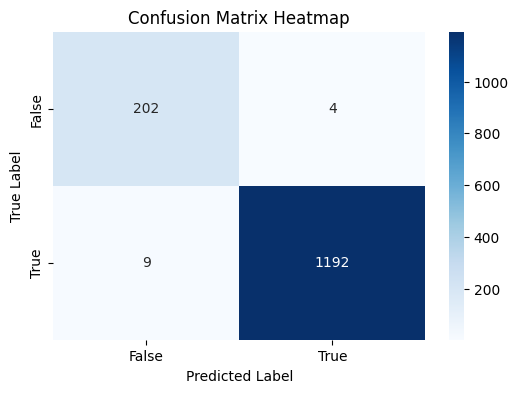

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar="False", xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

**Precision-Recall Curve**

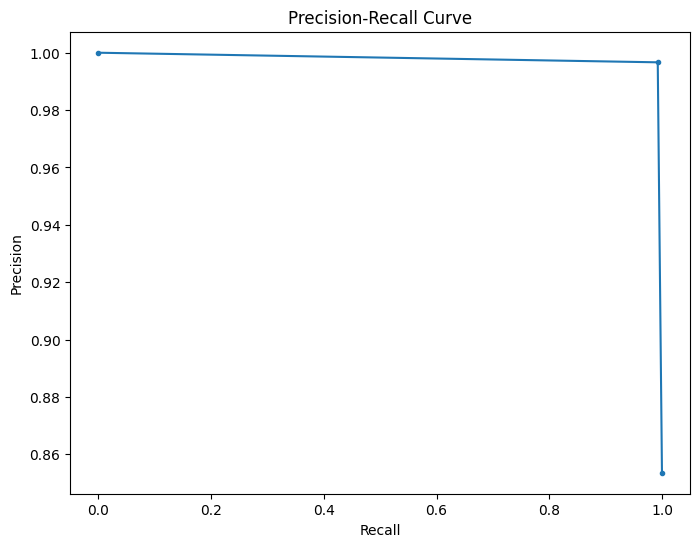

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall values for different thresholds
y_prob = model.predict_proba(X_test)[:,1]  # Probability for the positive class
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

**Classification Report Heatmap**

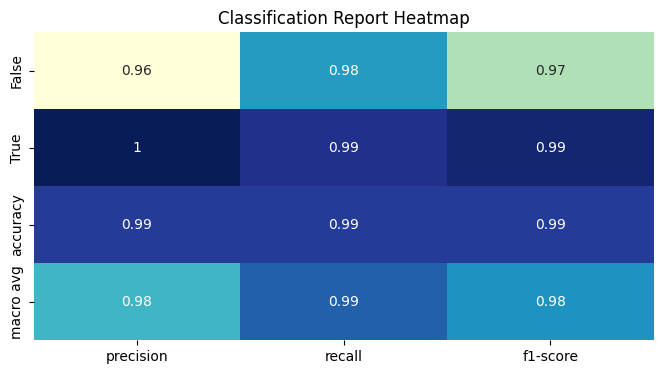

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()


# Plot the classification report
plt.figure(figsize=(8,4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap = "YlGnBu", cbar=False)
plt.title("Classification Report Heatmap")
plt.show()

# **Training the Model with Malicious Data on the Training Set**


---


---





**Baseline model from above for accuracy**

In [ ]:
mal_model = HistGradientBoostingClassifier(random_state=42)
mal_model.fit(X_train_balanced, y_train_balanced)

HistGradientBoostingClassifier(random_state=42)

**Evaluate on the test data**

In [ ]:
mal_y_pred = mal_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, mal_y_pred)
print(f'Baseline Accuracy: {baseline_accuracy:.4f}')

Baseline Accuracy: 0.9908


# **Train the Model with Malicious Data**

---

To simulate an attacker modifying the data we will flip a percentage of the labels ig. True -> False, False -> True

In [ ]:
# Define a function for flippling the labels by a %
def poison_data(X_train_balanced, y_train_balanced, flip_percent):

  # % of samples to flip
  n_samples = int(len(y_train_balanced) * flip_percent / 100)

  # Random indices to flip and to keep consistent for reproducibility
  np.random.seed(42)
  flip_indicies = np.random.choice(len(y_train_balanced), n_samples, replace= False)

  # Create the poisoned labels
  y_train_balanced_poisoned = y_train_balanced.copy()
  for idx in flip_indicies:
    # True -> False, False -> True
    y_train_balanced_poisoned[idx] = not y_train_balanced[idx]
  return X_train_balanced, y_train_balanced_poisoned

Evaluate the model under attack from the poisoned data

In [ ]:
results = []

# Loop over different percentages of poisoned data to see the effects
for flip_percent in range(0, 51, 5):
  # start at 0%, end at 50 % in 5 percent increments
  X_train_poisoned, y_train_poisoned = poison_data(X_train_balanced, y_train_balanced, flip_percent)

  # Train the model on the poisoned data
  mal_model.fit(X_train_poisoned, y_train_poisoned)

  # Evaluate on the Clean test set
  y_pred_poisoned = mal_model.predict(X_test)
  poisoned_accuracy = accuracy_score(y_test, y_pred_poisoned)

  # Store the results
  results.append((flip_percent, poisoned_accuracy))
  print(f'Poisoning {flip_percent}%: Accuracy = {poisoned_accuracy:.4f}')



Poisoning 0%: Accuracy = 0.9908
Poisoning 5%: Accuracy = 0.9893
Poisoning 10%: Accuracy = 0.9893
Poisoning 15%: Accuracy = 0.9879
Poisoning 20%: Accuracy = 0.9872
Poisoning 25%: Accuracy = 0.9808
Poisoning 30%: Accuracy = 0.9723
Poisoning 35%: Accuracy = 0.9467
Poisoning 40%: Accuracy = 0.9019
Poisoning 45%: Accuracy = 0.7953
Poisoning 50%: Accuracy = 0.4627


## **Visualize the accuracy vs. the percentage of poisoned data**

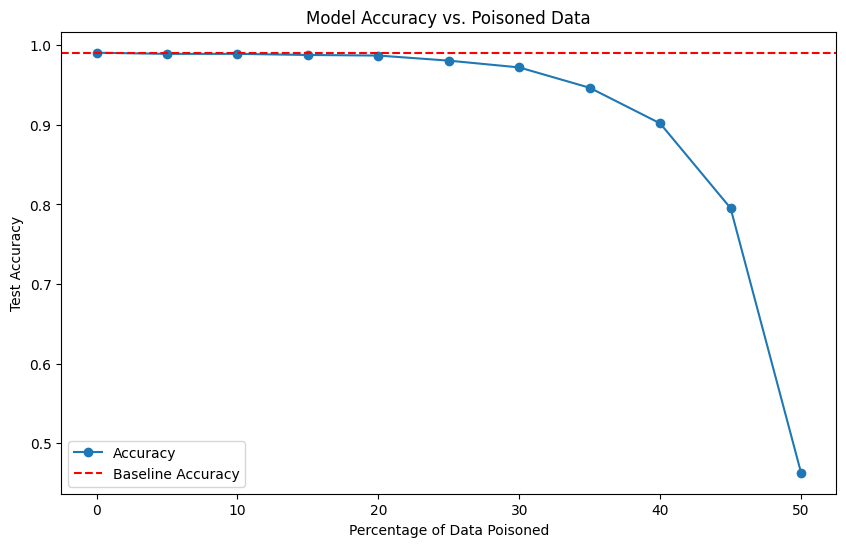

In [ ]:
results_df = pd.DataFrame(results, columns = ["Poisoning Percentage", "Accuracy"])

plt.figure(figsize = (10,6))
plt.plot(results_df["Poisoning Percentage"], results_df["Accuracy"], marker = 'o', label = "Accuracy")
plt.axhline(baseline_accuracy, color = 'r', linestyle = '--', label="Baseline Accuracy")
plt.xlabel("Percentage of Data Poisoned")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy vs. Poisoned Data")
plt.legend()
plt.show()


## **Visualize the poisoning with <mark>ROC Curve</mark>**


---

We will use the predict_proba method in the HistGradientBoostingClassifier
then compute the ROC curve and AUC score.
Plot the ROC curves to visualize the different levels of poisoning to compare perfomance.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Store the AUC scores
roc_results = []

# Loop over the percentages of poisoned data
for flip_percent in range(0, 51, 5):
  X_train_poisoned, y_train_poisoned = poison_data(X_train_balanced, y_train_balanced, flip_percent)

  # Train the model on poisoned data
  mal_model.fit(X_train_poisoned, y_train_poisoned)

  # Predict the probabilities on the test set
  y_prob_poisoned = mal_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

  # Compute the ROC curve and AUC
  fpr, tpr, _ = roc_curve(y_test, y_prob_poisoned)
  auc_score = roc_auc_score(y_test, y_prob_poisoned)

  # Store the results
  roc_results.append((flip_percent, fpr, tpr, auc_score))
  print(f'Poisoning {flip_percent}%: AUC = {auc_score:.4f}')





Poisoning 0%: AUC = 0.9974
Poisoning 5%: AUC = 0.9872
Poisoning 10%: AUC = 0.9881
Poisoning 15%: AUC = 0.9911
Poisoning 20%: AUC = 0.9900
Poisoning 25%: AUC = 0.9909
Poisoning 30%: AUC = 0.9886
Poisoning 35%: AUC = 0.9749
Poisoning 40%: AUC = 0.9396
Poisoning 45%: AUC = 0.8219
Poisoning 50%: AUC = 0.4989


**Visualize the ROC Curve**

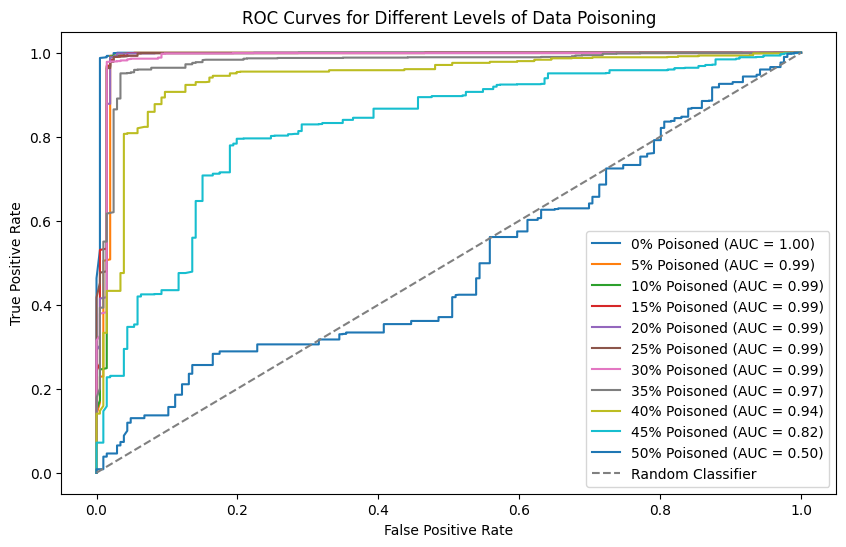

In [ ]:
plt.figure(figsize= (10, 6))

for flip_percent, fpr, tpr, auc_score in roc_results:
  plt.plot(fpr, tpr, label = f"{flip_percent}% Poisoned (AUC = {auc_score:.2f})")

# Add a random model line
plt.plot([0, 1], [0, 1], linestyle = "--", color = 'gray', label = "Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Levels of Data Poisoning")
plt.legend()
plt.show()